In [2]:
# importing libraries, etc...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = "https://raw.githubusercontent.com/LennardVaarten/ML-Workshops/main/data/"

The [Gapminder](https://www.gapminder.org/) dataset contains historical data (mid-19th century onwards) containing hundreds of indicators such as life expectancy and GDP for countries around the world.
For our purpose, we will try to predict the life expectancy of countries based on several of these indicators. I have only included data from the year 2018.

In [3]:
# loading

life_expectancy = pd.read_csv(path+"life_expectancy.csv")

In [4]:
# viewing

life_expectancy

,life_expectancy_years,child_mortality_0_5_year_olds_dying_per_1000_born,children_and_elderly_per_100_adults,children_per_woman_total_fertility,crude_death_rate_deaths_per_1000_population,income_per_person_gdppercapita_ppp_inflation_adjusted,population_growth_annual_percent_with_projections,population_total,life_expectancy_sex_ratio,population_sex_ratio,country
0,58.69,65.924,80.353,4.33,6.443,1867.0,2.309,36373176.0,0.958807,1.062219,afg
1,65.19,81.638,98.221,5.55,8.243,5846.0,3.255,30774205.0,0.911825,0.962679,ago
2,76.97,10.620,56.313,2.26,7.557,18942.0,0.930,44688864.0,0.907896,0.958863,arg
3,75.97,12.920,44.200,1.60,9.688,8662.0,0.107,2934152.0,0.918373,0.888299,arm
4,82.87,3.398,53.564,1.83,6.695,45783.0,1.288,24772247.0,0.956382,0.992728,aus
...,...,...,...,...,...,...,...,...,...,...,...
194,71.86,14.630,50.986,2.06,7.094,13505.0,0.462,108339.0,0.935144,1.009945,grd
195,62.23,52.532,64.731,3.57,6.944,1888.0,1.702,118414.0,0.905009,0.972727,kir
196,74.23,12.674,45.796,2.25,8.330,27546.0,0.507,95235.0,0.885215,0.971965,syc
197,65.80,32.766,60.715,3.05,6.235,3409.0,0.677,106227.0,0.965438,1.052121,fsm


In [5]:
# checking the number of missing values per feature

life_expectancy.isna().sum()

life_expectancy_years                                     0
child_mortality_0_5_year_olds_dying_per_1000_born         1
children_and_elderly_per_100_adults                       0
children_per_woman_total_fertility                        0
crude_death_rate_deaths_per_1000_population               0
income_per_person_gdppercapita_ppp_inflation_adjusted    11
population_growth_annual_percent_with_projections         0
population_total                                          0
life_expectancy_sex_ratio                                 0
population_sex_ratio                                      0
country                                                   0
dtype: int64

In [6]:
# imputing missing values using the k-NN algorithm, with n_neighbors=3

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3).fit(life_expectancy.iloc[:,:-1])
life_expectancy.iloc[:,:-1] = imputer.transform(life_expectancy.iloc[:,:-1])

In [7]:
# voila: no more missing values!

life_expectancy.isna().sum()

life_expectancy_years                                    0
child_mortality_0_5_year_olds_dying_per_1000_born        0
children_and_elderly_per_100_adults                      0
children_per_woman_total_fertility                       0
crude_death_rate_deaths_per_1000_population              0
income_per_person_gdppercapita_ppp_inflation_adjusted    0
population_growth_annual_percent_with_projections        0
population_total                                         0
life_expectancy_sex_ratio                                0
population_sex_ratio                                     0
country                                                  0
dtype: int64

In [8]:
life_expectancy

,life_expectancy_years,child_mortality_0_5_year_olds_dying_per_1000_born,children_and_elderly_per_100_adults,children_per_woman_total_fertility,crude_death_rate_deaths_per_1000_population,income_per_person_gdppercapita_ppp_inflation_adjusted,population_growth_annual_percent_with_projections,population_total,life_expectancy_sex_ratio,population_sex_ratio,country
0,58.69,65.924,80.353,4.33,6.443,1867.000000,2.309,36373176.0,0.958807,1.062219,afg
1,65.19,81.638,98.221,5.55,8.243,5846.000000,3.255,30774205.0,0.911825,0.962679,ago
2,76.97,10.620,56.313,2.26,7.557,18942.000000,0.930,44688864.0,0.907896,0.958863,arg
3,75.97,12.920,44.200,1.60,9.688,8662.000000,0.107,2934152.0,0.918373,0.888299,arm
4,82.87,3.398,53.564,1.83,6.695,45783.000000,1.288,24772247.0,0.956382,0.992728,aus
...,...,...,...,...,...,...,...,...,...,...,...
194,71.86,14.630,50.986,2.06,7.094,13505.000000,0.462,108339.0,0.935144,1.009945,grd
195,62.23,52.532,64.731,3.57,6.944,1888.000000,1.702,118414.0,0.905009,0.972727,kir
196,74.23,12.674,45.796,2.25,8.330,27546.000000,0.507,95235.0,0.885215,0.971965,syc
197,65.80,32.766,60.715,3.05,6.235,3409.000000,0.677,106227.0,0.965438,1.052121,fsm


In [9]:
# scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(life_expectancy.iloc[:,1:-1])
life_expectancy.iloc[:,1:-1] = scaler.transform(life_expectancy.iloc[:, 1:-1])

In [10]:
# splitting into training set and test set

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(life_expectancy.iloc[:,1:-1],
                                                                            life_expectancy.iloc[:,0],
                                                                            test_size=0.35,
                                                                            random_state=99)

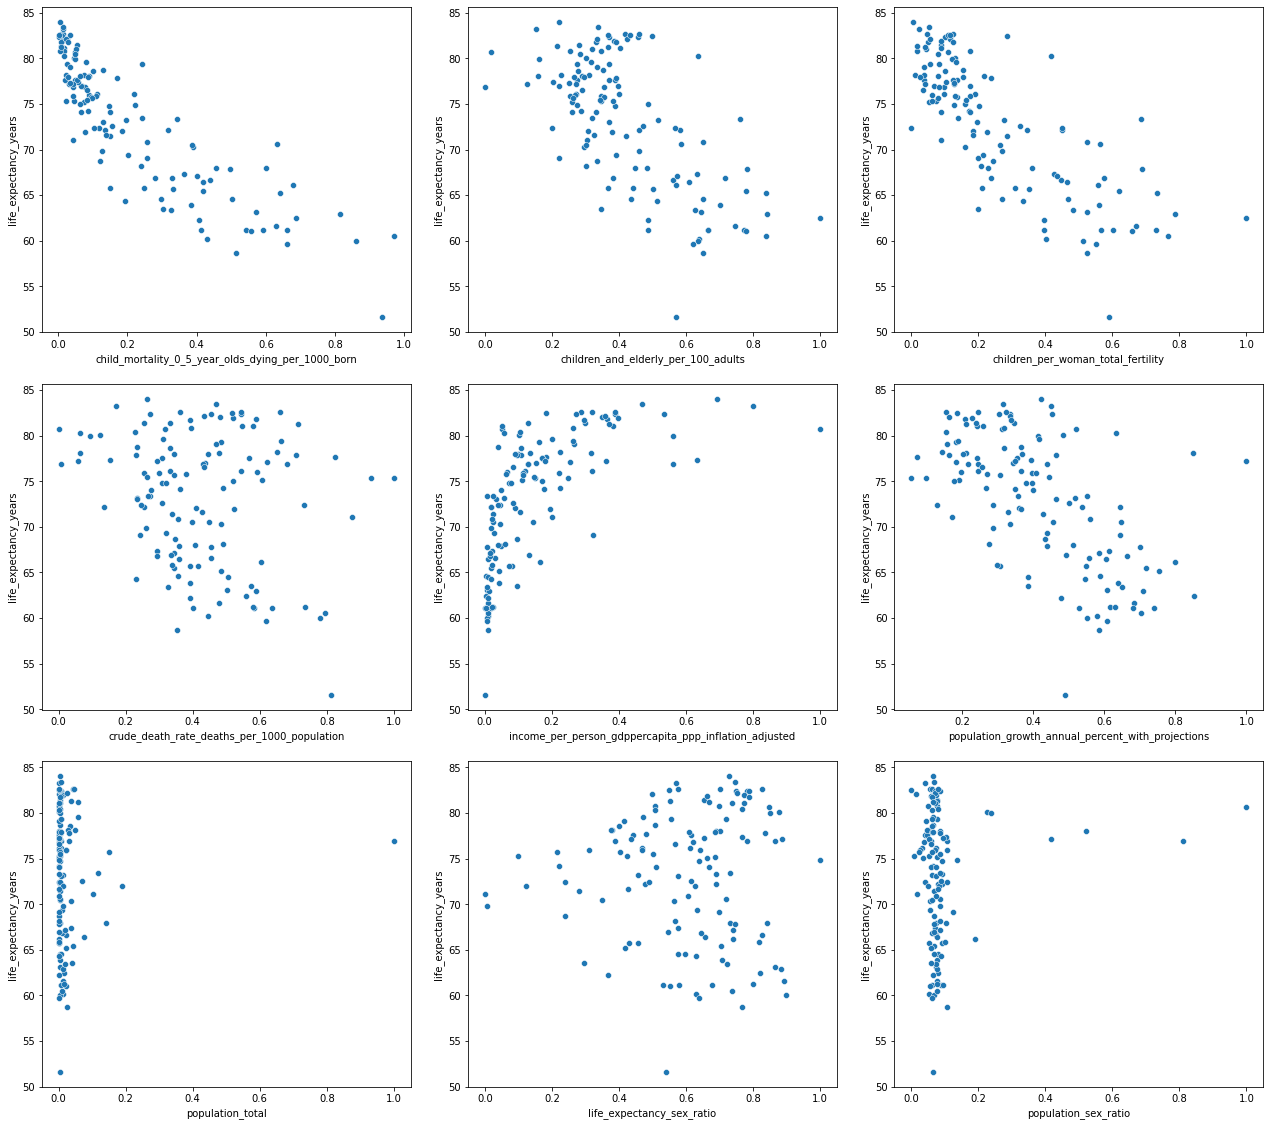

In [11]:
train = pd.concat([target_train, features_train], axis=1)

fig, axes = plt.subplots(3,3, figsize=(18,16))

for i in range(len(train.columns)-1):
    sns.scatterplot(data=train, ax=axes[i//3, i%3], x=train.columns[i+1], y=train.columns[0])

fig.tight_layout(pad=2)

Let's get to work: try changing the parameters 'n_neighbors' and 'weights' ("uniform" or "distance") in the k-NN model below. What happens to the scores on the training set and the test set as you tweak these parameters? What's the best model you can find? Share it on the discussion board!

In [25]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights="uniform")

knn.fit(features_train, target_train)

print("Training set score: {:.4f}".format(knn.score(features_train, target_train)))
print("Test set score: {:.4f}".format(knn.score(features_test, target_test)))

Training set score: 0.8477
Test set score: 0.8454


Now, run a linear regression model. Feel free to copy some of my code from the CLASS_schools notebook. Does it do better than k-NN?

In [26]:
from sklearn.linear_model import LinearRegression

Training set score: 0.8358
Test set score: 0.8050
